In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

A singular Jacobian encountered when solving the collocation system.


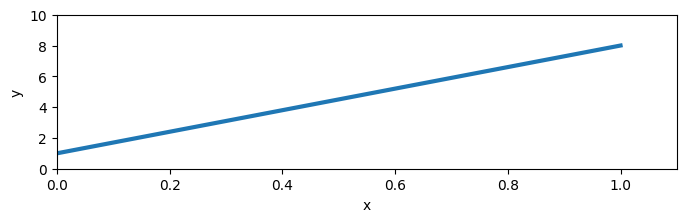

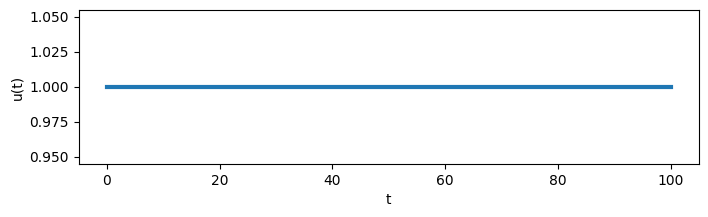

1.0 1.0 1.0


In [24]:
t0 = 0
tf = 100

U = 9
L = 7
sigma2 = 0.1**2
Sx = 0
Ex = 1

Sy = 1

C = (Ex - Sx) / (tf - t0)
g = 9.8

# determine how long to run the BVP solver
t_span = (0, 100)
t_steps = 100
t = np.linspace(t_span[0], t_span[1], t_steps)

# setup the ode and boundary conditions for this problem
def ode(t, y_var):
    x, y, xp, yp, p0, p1, p2, p3 = y_var
    u = p3
    zeros = np.zeros_like(x)
    ones = np.ones_like(x)
    return np.array([
        xp,
        yp,
        zeros,
        u - ones*g,
        zeros,
        zeros,
        -p0,
        -p1
    ])
def bc(ya, yb):
    y_tf = yb[1]
    avg_U_L = (U + L)/2
    
    p1_end = (-1/sigma2) * 2*(y_tf - avg_U_L) * np.exp(-(y_tf - avg_U_L)**2/sigma2)
    
    return np.array([
        ya[0] - Sx,
        ya[1] - Sy,
        ya[2] - C,
        ya[3] - 0,
        yb[0] - Ex,
        yb[5] - p1_end,
        yb[6] - 0,
        yb[7] - 0
        
    ])

# solve the bvp with the y0
y0 = np.zeros((8, t_steps))

x_guess = np.linspace(Sx, Ex, t_steps)
y_guess = np.linspace(Sy, (U+L)/2, t_steps)
xp_guess = np.ones(t_steps)*C
yp_guess = np.ones(t_steps)*(((U+L)/2 - Sy) / (tf - t0))
p0_guess = np.ones(t_steps)
p1_guess = np.ones(t_steps)
p2_guess = np.ones(t_steps)
p3_guess = np.ones(t_steps)*g
y0 = np.vstack((x_guess, y_guess, xp_guess, yp_guess, p0_guess, p1_guess, p2_guess, p3_guess))
sol = solve_bvp(ode, bc, t, y0, tol=1e-5, max_nodes=int(6e5))
print(sol.message)

# extract the values from the solution
x = sol.y[0]
y = sol.y[1]
xp = sol.y[2]
yp = sol.y[3]
p1 = sol.y[4]
p2 = sol.y[5]
p3 = sol.y[6]
p4 = sol.y[7]

# compute the optimal control
u = p3

# plot the x(t)
plt.plot(x, y, linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.gcf().set_size_inches(8,2)
plt.xlim(0,1.1)
plt.ylim(0,10)
plt.show()

# plot the u(t)
plt.plot(t, u, linewidth=3)
plt.xlabel("t")
plt.ylabel("u(t)")
plt.gcf().set_size_inches(8,2)
plt.show()

print(u[0], u[len(u)//2], u[-1])

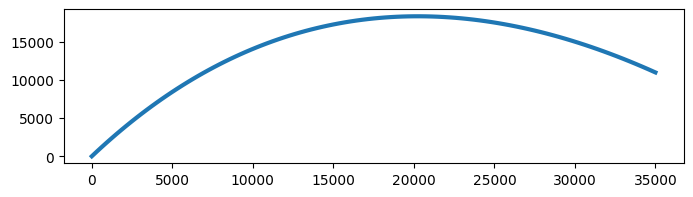

In [16]:
P_u = 9
P_l = 7
sigma2 = 1
Sx = 0
Sy = 0
forward_speed = 1
gravity = 9.8
Vx = 300
Vy = 600

# determine how long to run the BVP solver
t_span = (0, 100)
t_steps = 100
t, delta_t = np.linspace(t_span[0], t_span[1], t_steps, retstep=True)

# setup the ode and boundary conditions for this problem
def ode(t, y_var):
    x, y, xp, yp = y_var
    ones = np.ones_like(xp)
    return np.array([
        xp,         # x' = x + delta_T*x'
        yp,         # y' = y + delta_T*y'  
        ones,                     # x'' = x'
        -gravity*ones    # y'' = y' - g*delta_T
    ])
def bc(ya, yb):
    return np.array([
        ya[0] - Sx,             # x(0) = Sx
        ya[1] - Sy,             # y(0) = Sy
        ya[2] - Vx,  # x'(0) = forward_speed
        ya[3] - Vy               # y'(0) = 0
    ])

# solve the bvp with the y0
y0 = np.ones((4, t_steps))
sol = solve_bvp(ode, bc, t, y0)

# extract the values from the solution
x = sol.y[0]
y = sol.y[1]
xp = sol.y[2]
yp = sol.y[3]

# plot the x(t)
plt.plot(x, y, linewidth=3)
plt.gcf().set_size_inches(8,2)
plt.show()